In [1]:
import sys
sys.path.append('..')
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds
tf.compat.v1.enable_eager_execution()
import utils.dataset_gen as dsg
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Office31

In [2]:
ds = dsg.office31_datasets('D','A') #, lambda x: tf.compat.v2.keras.applications.vgg16.preprocess_input(x, mode='tf'))

## Visualise some samples

In [3]:
def show_batch(image_batch, label_batch, batch_size=15, dataset='office'):
    plt.figure(figsize=(10,10))
    OFFICE_CLASS_NAMES = np.array(dsg.office31_class_names())
    for n in range(batch_size):
        ax = plt.subplot(5,5,n+1)
        plt.imshow(np.squeeze(image_batch[n]))
        if dataset == 'office':
            plt.title(OFFICE_CLASS_NAMES[label_batch[n]==1][0].title())
        else:
            plt.title(label_batch[n].numpy())
        plt.axis('off')

In [5]:
si = iter(dsg.prep_ds_train(ds['source']['train'][0]))

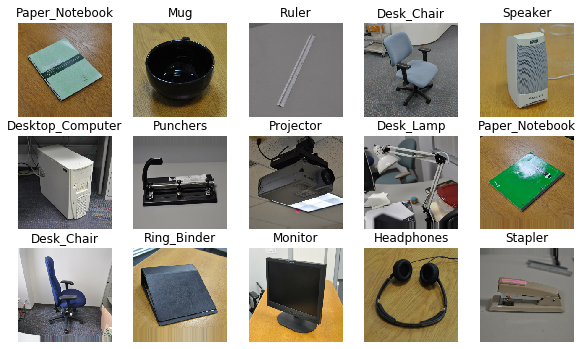

In [6]:
image_batch, label_batch = next(si)
show_batch(image_batch.numpy(), label_batch.numpy())

In [7]:
ti = iter(dsg.prep_ds_train(ds['target']['train'][0]))

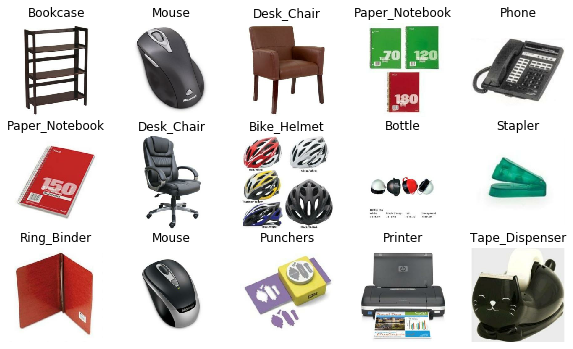

In [8]:
image_batch, label_batch = next(ti)
show_batch(image_batch.numpy(), label_batch.numpy())

## Check that combi dataset works

In [9]:
ds_combo = dsg.da_pair_dataset(source_ds=ds['source']['train'][0], 
                                   target_ds=ds['target']['train'][0], 
                                   ratio=1, 
                                   shuffle_buffer_size=5000)

Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(dataset)`.
Instructions for updating:
Use `tf.compat.v1.data.get_output_types(dataset)`.


In [11]:
ds_combo = ds_combo[0]

In [12]:
dsi_combo = iter(dsg.prep_ds(ds_combo, batch_size=4))

In [13]:
ins, outs = next(dsi_combo)
outs['aux_out'].numpy()

array([[[False, False, False, False, False, False, False, False, False,
         False, False, False, False,  True, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False],
        [False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False,  True, False, False,
         False, False, False, False]],

       [[False, False, False, False, False, False, False, False, False,
         False, False, False, False,  True, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False],
        [False, False, False,  True, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, Fals

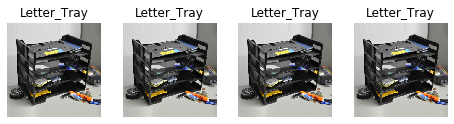

In [14]:
show_batch(ins['input_source'].numpy(), outs['preds'].numpy(), 4)

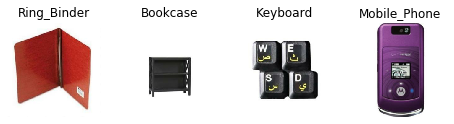

In [15]:
show_batch(ins['input_target'].numpy(), outs['preds_1'].numpy(), 4)

## Check picture values and preprocessing effect

In [17]:
# pic = tf.compat.v2.keras.preprocessing.image.load_img('datasets/Office31/amazon/images/back_pack/frame_0001.jpg', target_size=(224, 224))
# pic = tf.compat.v2.keras.preprocessing.image.img_to_array(pic)
pic = ins['input_target'][0]*255

tf.compat.v1.keras.applications.vgg16.preprocess_input(pic, mode='tf')
pic = pic.numpy()
pic.min(), pic.mean(), pic.max()

(0.0, 167.3842, 255.0)

## Check augmentation

In [19]:
ai = iter(dsg.augment(dsg.prep_ds_train(ds['source']['train'][0])))

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

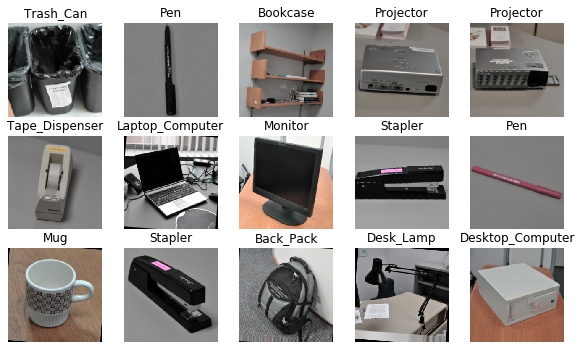

In [20]:
image_batch, label_batch = next(ai)
show_batch(image_batch.numpy(), label_batch.numpy())

In [21]:
ds_combo = dsg.da_pair_dataset(ds['source']['train'][0], ds['target']['train'][0], ratio=1, shuffle_buffer_size=5000)
ds_combo = ds_combo[0]
ds_combo = dsg.prep_ds_train(ds_combo, batch_size=4)
aic = iter(dsg.augment_pair(ds_combo, batch_size=4))

In [22]:
ins, outs = next(aic)
s_dat, t_dat = ins['input_source'], ins['input_target']
s_lbl, t_lbl, ll = outs['preds'], outs['preds_1'], outs['aux_out']
ll.numpy()

array([[[False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False],
        [False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False]],

       [[False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False],
        [False, False, False, False, False, False, False,  True, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, Fals

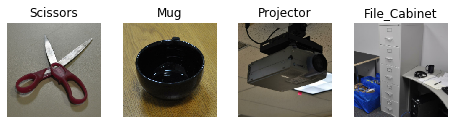

In [23]:
show_batch(s_dat.numpy(), s_lbl.numpy(), 4)

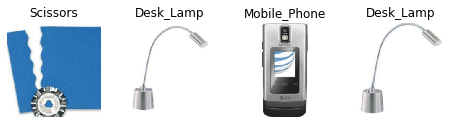

In [24]:
show_batch(t_dat.numpy(), t_lbl.numpy(), 4)

# MNIST

In [2]:
# mnist = iter(tfds.load(name="mnist", split="train").batch(15))
mnist_ds, mnist_info = tfds.load("mnist", split="train", with_info=True)
print(mnist_info)

tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.0,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann. lecun. com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)



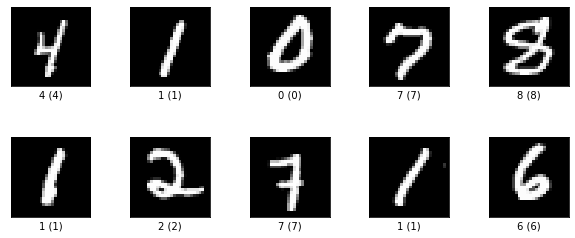

In [3]:
fig = tfds.show_examples(mnist_info, mnist_ds, rows=2, cols=5, plot_scale=2.0)

# MNIST-M

In [82]:
from utils import mnist_m
mnist_m_ds, mnist_m_info = tfds.load("mnist_m", split="train", with_info=True)
print(mnist_m_info)

tfds.core.DatasetInfo(
    name='mnist_m',
    version=0.1.0,
    description='The MNIST-M Dataset is an image digit recognition dataset generated by blending the MNIST dataset over patches randomly extracted from color photos from BSDS500.',
    homepage='https://arxiv.org/abs/1505.07818',
    features=FeaturesDict({
        'image': Image(shape=(32, 32, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=68002,
    splits={
        'test': 9001,
        'train': 59001,
    },
    supervised_keys=('image', 'label'),
    citation="""@misc{ganin2015domainadversarial,
        title={Domain-Adversarial Training of Neural Networks},
        author={Yaroslav Ganin and Evgeniya Ustinova and Hana Ajakan and Pascal Germain and Hugo Larochelle and François Laviolette and Mario Marchand and Victor Lempitsky},
        year={2015},
        eprint={1505.07818},
        archivePrefix={arXiv},
        primaryClass={stat.ML}
    }"

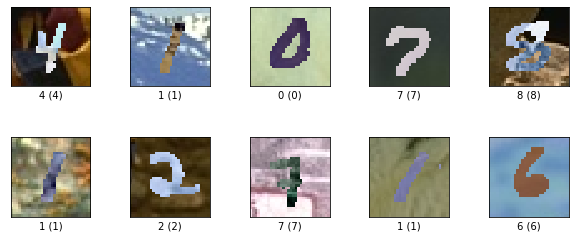

In [83]:
fig = tfds.show_examples(mnist_m_info, mnist_m_ds, rows=2, cols=5, plot_scale=2.0)

# SVHN (cropped)

In [84]:
svhn_df, svhn_info = tfds.load("svhn_cropped", split="test", with_info=True)
print(svhn_info)

tfds.core.DatasetInfo(
    name='svhn_cropped',
    version=3.0.0,
    description='The Street View House Numbers (SVHN) Dataset is an image digit recognition dataset of over 600,000 digit images coming from real world data. Images are cropped to 32x32.',
    homepage='http://ufldl.stanford.edu/housenumbers/',
    features=FeaturesDict({
        'image': Image(shape=(32, 32, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=630420,
    splits={
        'extra': 531131,
        'test': 26032,
        'train': 73257,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{Netzer2011,
    author = {Netzer, Yuval and Wang, Tao and Coates, Adam and Bissacco, Alessandro and Wu, Bo and Ng, Andrew Y},
    booktitle = {Advances in Neural Information Processing Systems ({NIPS})},
    title = {Reading Digits in Natural Images with Unsupervised Feature Learning},
    year = {2011}
    }""",
    redistribution_

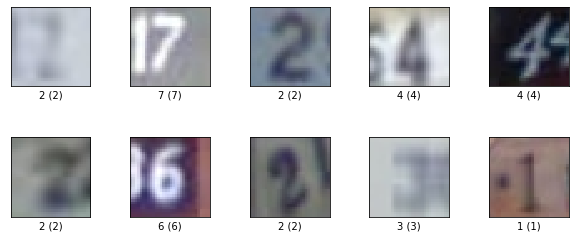

In [85]:
fig = tfds.show_examples(svhn_info, svhn_df, rows=2, cols=5, plot_scale=2.0)

# USPS

In [89]:
from utils import usps
usps_ds, usps_info = tfds.load("usps", split="train", with_info=True)
print(usps_info)

tfds.core.DatasetInfo(
    name='usps',
    version=0.1.0,
    description='The USPS Dataset is an image digit recognition dataset consisting of segmented numerals digitized from handwritten zipcodes that appeared on real U.S. Mail passing through the Buffalo, N.Y. post office.',
    homepage='https://papers.nips.cc/paper/293-handwritten-digit-recognition-with-a-back-propagation-network',
    features=FeaturesDict({
        'image': Image(shape=(16, 16, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=11000,
    splits={
        'train': 11000,
    },
    supervised_keys=('image', 'label'),
    citation="""@incollection{lecun90handwritten,
        title = {Handwritten Digit Recognition with a Back-Propagation Network},
        author = {LeCun, Yann and Bernhard E. Boser and John S. Denker and Donnie Henderson and R. E. Howard and Wayne E. Hubbard and Lawrence D. Jackel},
        booktitle = {Advances in Neural In

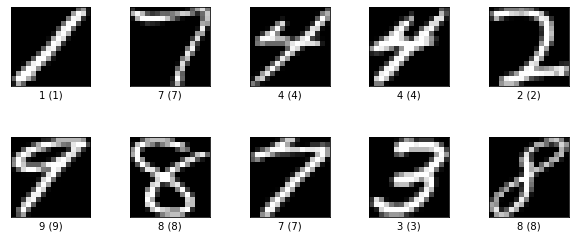

In [90]:
fig = tfds.show_examples(usps_info, usps_ds, rows=2, cols=5, plot_scale=2.0)